In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

start = '2012-01-01'
end= '2024-03-21'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [2]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3068,2024-03-14,142.300003,144.729996,141.485001,144.339996,144.339996,36117900
3069,2024-03-15,143.410004,144.339996,141.130005,142.169998,142.169998,41025900
3070,2024-03-18,149.369995,152.929993,148.139999,148.479996,148.479996,47676700
3071,2024-03-19,148.979996,149.619995,147.009995,147.919998,147.919998,17748400


In [5]:
# moving average data of last 100 days
ma_100_days = data.Close.rolling(100).mean()

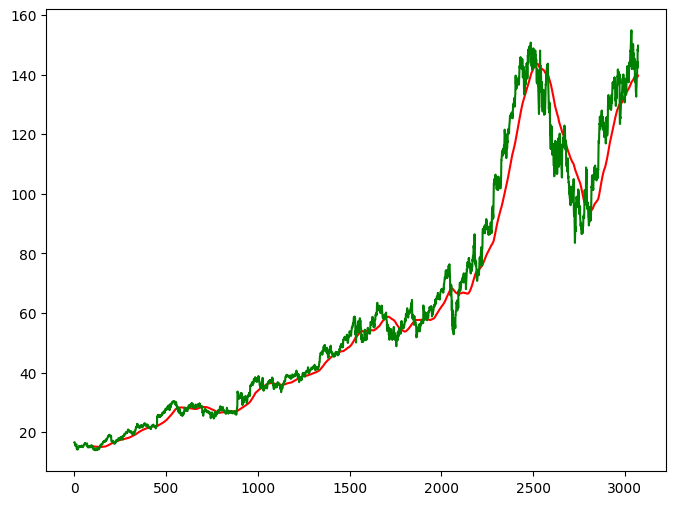

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

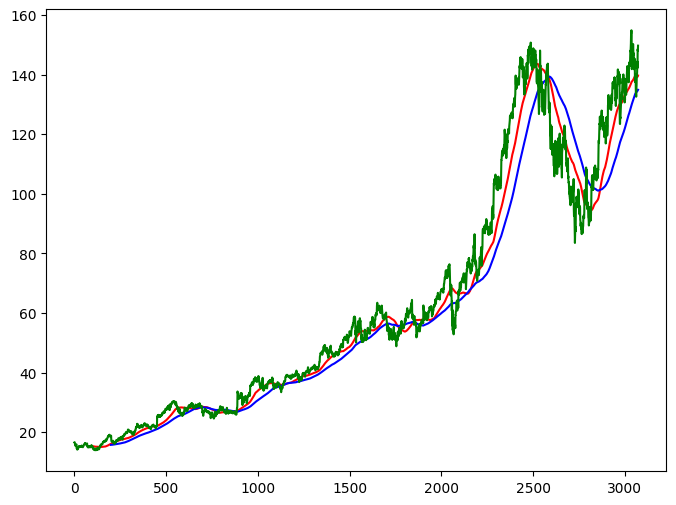

In [7]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [10]:
#distribution of data 80% Training and 20% test
data_train = data['Close'].iloc[0: int(len(data)*0.80)]
data_test = data['Close'].iloc[int(len(data)*0.80):]

In [11]:
data_train.shape[0]

2458

In [12]:
data_test.shape[0]

615

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train_reshaped)

In [16]:
# taking first 100 days of stock to calculate 101 day prediction
x =[]
y=[]

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y=np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

D:\Miniconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer ='adam' , loss='mean_squared_error')

In [20]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - loss: 0.0345
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.0041
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0035
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0026
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0030
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0023
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0032
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0025
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0030
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0024
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0019
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0024
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0018
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0019
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [28]:
# Reshape the data_test Series into a DataFrame with a single column
data_test_reshaped = data_test.values.reshape(-1, 1)

data_test_scale = scaler.fit_transform(data_test_reshaped)

In [29]:
# taking first 100 days of stock to calculate 101 day prediction
x =[]
y=[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step


In [31]:
y_predict

array([[0.81072396],
       [0.80605763],
       [0.80344075],
       [0.802228  ],
       [0.8018965 ],
       [0.802596  ],
       [0.8045024 ],
       [0.8077677 ],
       [0.8124264 ],
       [0.8180436 ],
       [0.82410353],
       [0.82951504],
       [0.8335078 ],
       [0.8359163 ],
       [0.8378561 ],
       [0.840334  ],
       [0.84414965],
       [0.8489317 ],
       [0.85431933],
       [0.86011994],
       [0.8664067 ],
       [0.8732311 ],
       [0.8804782 ],
       [0.88788015],
       [0.89474565],
       [0.90058386],
       [0.9055676 ],
       [0.9099644 ],
       [0.91391695],
       [0.91749   ],
       [0.9209203 ],
       [0.9242885 ],
       [0.9271993 ],
       [0.92926246],
       [0.93031913],
       [0.9299428 ],
       [0.9283225 ],
       [0.9254868 ],
       [0.92140156],
       [0.9164899 ],
       [0.91113615],
       [0.9058156 ],
       [0.9014435 ],
       [0.89877725],
       [0.8980378 ],
       [0.899116  ],
       [0.9013972 ],
       [0.903

In [32]:
scale=1/scaler.scale_

In [33]:
y_predict = y_predict*scale

In [34]:
y = y*scale

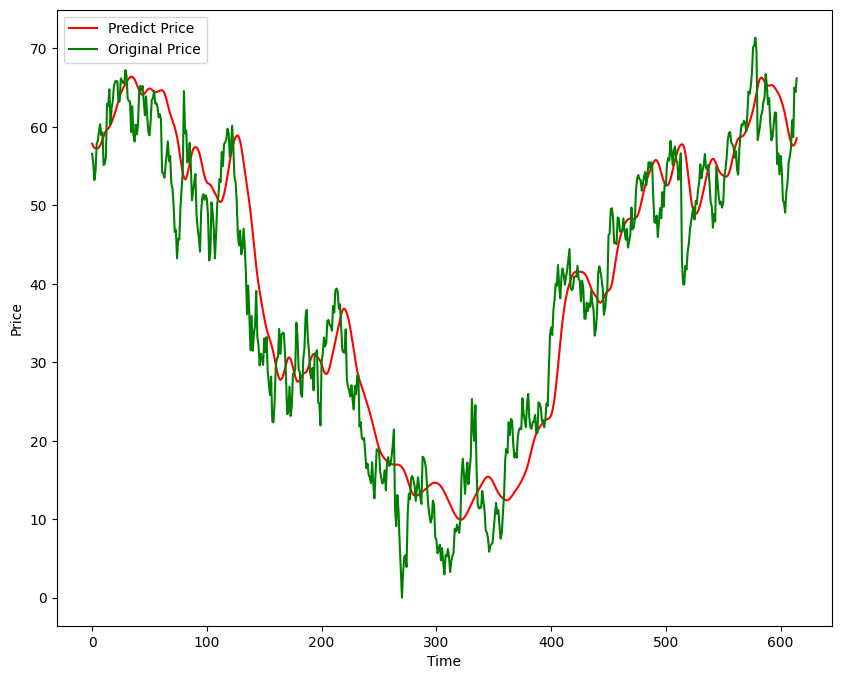

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' ,label ='Predict Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
model.save('Stock model LSTM.keras')